<h2> Ejercicios varios relacionados con grupos de Lie </h2>



In [1]:
from sympy import *
init_printing() #muestra símbolos más agradab
R=lambda n,d: Rational(n,d)

**Ejercicio (1ª parcial 2018):** Resolver $\frac{dy}{dx}=\frac{x y^{4}}{3} - \frac{2 y}{3 x} + \frac{1}{3 x^{3} y^{2}}$. 

Intentaremos con la heuística $$\xi=ax+cy+e$$ y $$\eta=bx+dy+f$$ para encontrar las simetrías 
    
    
    

    
 

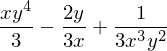

In [67]:
x,y,a,b,c,d,e,f=symbols('x,y,a,b,c,d,e,f',real=True)
#cargamos la función
F=x*y**4/3-R(2,3)*y/x+R(1,3)/x**3/y**2
F

Hacemos  $\xi=ax+cy+e$ y $\eta=bx+dy+f$

In [3]:
xi=a*x+c*y+e
eta=b*x+d*y+f
xi, eta

Condición de simetría linealizada

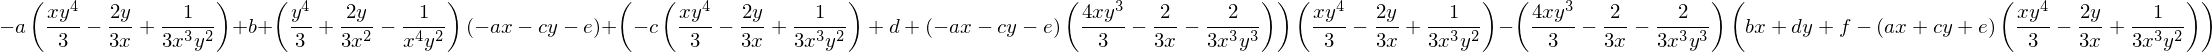

In [4]:
Q=eta-xi*F
CondSim=Q.diff(x)+F*Q.diff(y)-F.diff(y)*Q
CondSim

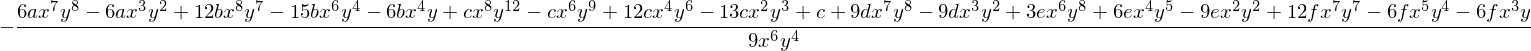

In [5]:
CondSim=CondSim.factor()
CondSim

In [6]:
CondSim1,nosirvo=fraction(CondSim)
CondSim1

In [7]:
e1=CondSim1.coeff(x**7).coeff(y**7)
e1

debe ser $f=0$

In [8]:
CondSim2=CondSim1.subs(f,0)
CondSim2

In [9]:
e2=CondSim2.coeff(x**7).coeff(y**8)
e2

Vemos que $d=-2/3a$.

In [10]:
CondSim3=CondSim2.subs(d,-2*a/3)
CondSim3

debe ser $c=0$.

In [11]:
CondSim4=CondSim3.subs(c,0)
CondSim4

In [12]:
e3=CondSim4.coeff(x**8).coeff(y**7)
e3

Vemos que  $b=0$.

In [13]:
CondSim5=CondSim4.subs(b,0)
CondSim5

Se cumple si $e=0$. 

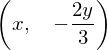

In [14]:
xi=xi.subs({c:0,f:0,e:0,a:1,b:0,d:-R(2,3)})
eta=eta.subs({c:0,f:0,e:0,a:1,b:0,d:-R(2,3)})
xi,eta

**Puntos invariantes:**  $(0,0)$.  Allí no tendremos coordenadas canónicas.  

Para hallar la coordenada invariante resolvemos
$$y'=\frac{\eta}{\xi}.$$

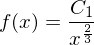

In [15]:
f=Function('f')(x)
xi2=xi.subs(y,f)
eta2=eta.subs(y,f)
dsolve(Eq(f.diff(x),eta2/xi2),f)


Esto nos indica que $r=x^{\frac{2}{3}}y$ es una solución. Como $H(r)$ también sirve cualquiera sea la $H$, con $H'\neq 0$. Eligiendo $F(r)=r^3$ podemos suponer $r= x^2y^3$.

In [39]:
r=x**2*y**3
r

Para hallar $s$ resolvemos
$$s=\int\frac{1}{\xi}dx.$$

In [40]:
s=integrate(xi2**(-1),x)
s

Sympy no integra bien el logarítmo

In [41]:
s=log(abs(x))
r, s

Reemplacemos en la fórmula de cambios de variables
$$\frac{ds}{dr}=\left.\frac{s_x+s_y F}{r_x+r_y F}\right|_{x=e^s,y=r^{1/3}e^{-2/3s}}.$$


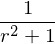

In [42]:

Ecua=( (s.diff(x)+s.diff(y)*F)/(r.diff(x)+r.diff(y)*F)).simplify()
r,s=symbols('r,s',real=True)
Ecua=Ecua.subs({x:exp(s),y:r**R(1,3)*exp(-R(2,3)*s)}) 
Ecua

Resolvamos $\frac{dr}{ds}=\frac{1}{1+r^2}$. La solucón gral es $\arctan(r)=s+C$. Expresemos la ecuación en coordenadas cartesianas

$$\arctan(x^2y^3)=\log(|x|)+C.$$

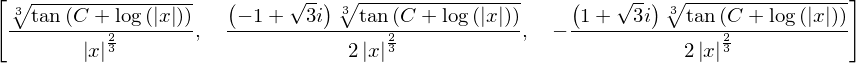

In [69]:
C=symbols('C',real=True)
sol=Eq(atan(x**2*y**3),log(abs(x))+C)
solExpl=solve(sol,y)
solExpl

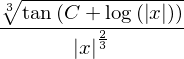

In [70]:
yg=solExpl[0]
yg

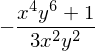

In [71]:
Q=simplify(eta-xi*F)
Q

No hay soluciones invariantes

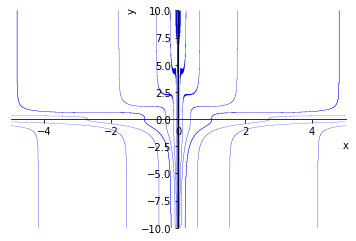

In [78]:
p=plot_implicit(sol.subs(C,0),(x,-5,5),(y,-10,10),show=False)
for k in range(-10,10):
    p.append(plot_implicit(sol.subs(C,k),(x,-5,5),(y,-10,10),show=False)[0])
p.show()